# BYU Chapter 27: Data Preparation & Automation


A common question among Data Scientist roles is: What is the split between data preparation and modeling. Most responses are 70/30 or 80/20. In short, much more time is spent preparing the data then modeling. The format of the data before running a model can drastically affect your results. Here we'll practice 3 methods to deal with missing values: List-wise deletion, Pair-wise deletion.

In [206]:
import pandas as pd
import missingno as msno

In [207]:
#Here import the data

reviews = pd.read_csv("gm_reviews_chapter_27_v1.csv", index_col='id_review')

In [208]:
reviews.isnull().sum().to_frame()

,0
company_name,0
caption,6
timestamp,0
retrieval_date,0
rating,0
username,0
tot_user_reviews,1
n_review_user,0
n_photo_user,0
url_user,0


# Method 1: List-wise deletion

One way to improve predictive modeling is by deleting rows altogether that have missing values. The disadvantage here is this will decrease your sample size when training your data. Below we will use the matrix() method from the **missingno** library to check for missing values and in the future validate any changes made to our data.

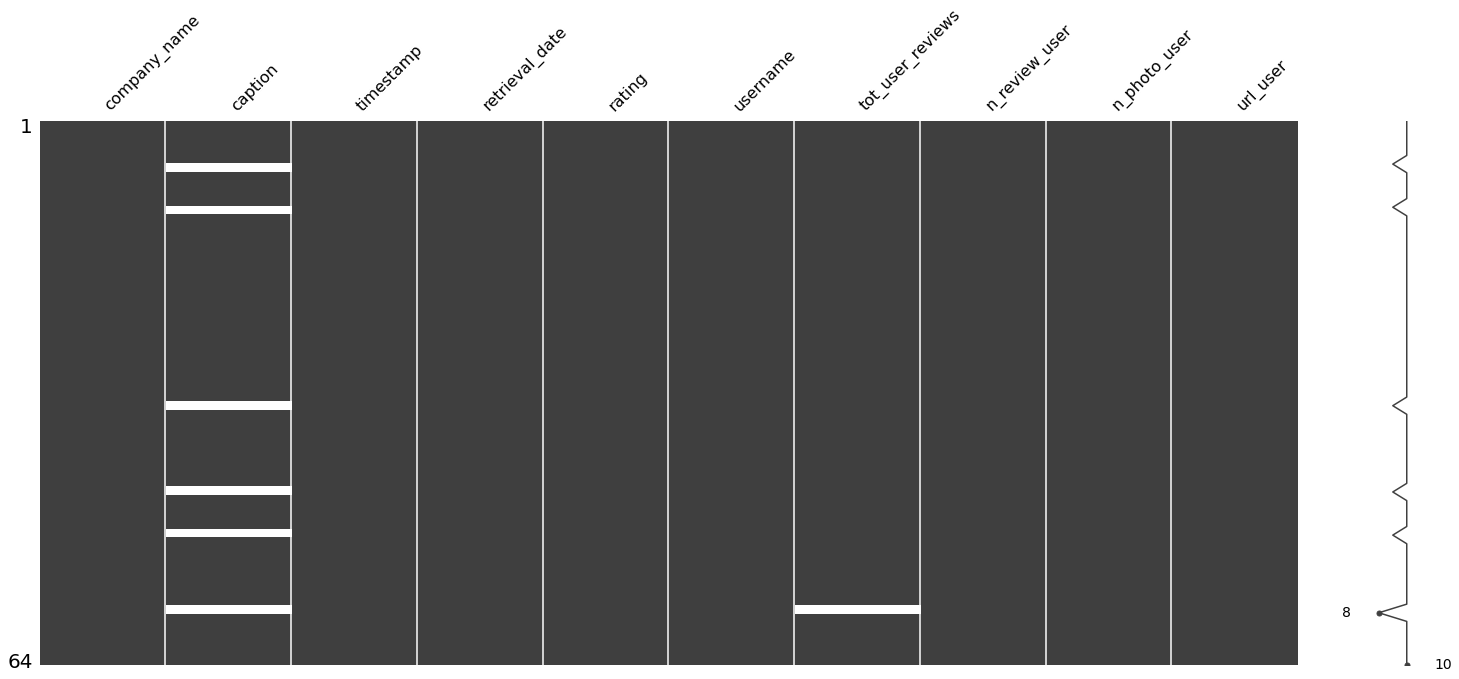

In [209]:
msno.matrix(reviews)

The plot above shows there are 14 missing values in the **caption** column. Below, we will remove these columns by filtering the data set where the values in the caption column are **not** null. The most efficient way, however, is to use listwise deletion is the **dropna()** method. We can compare the before and after matrices and see now there are only 58 rows instead of 64.

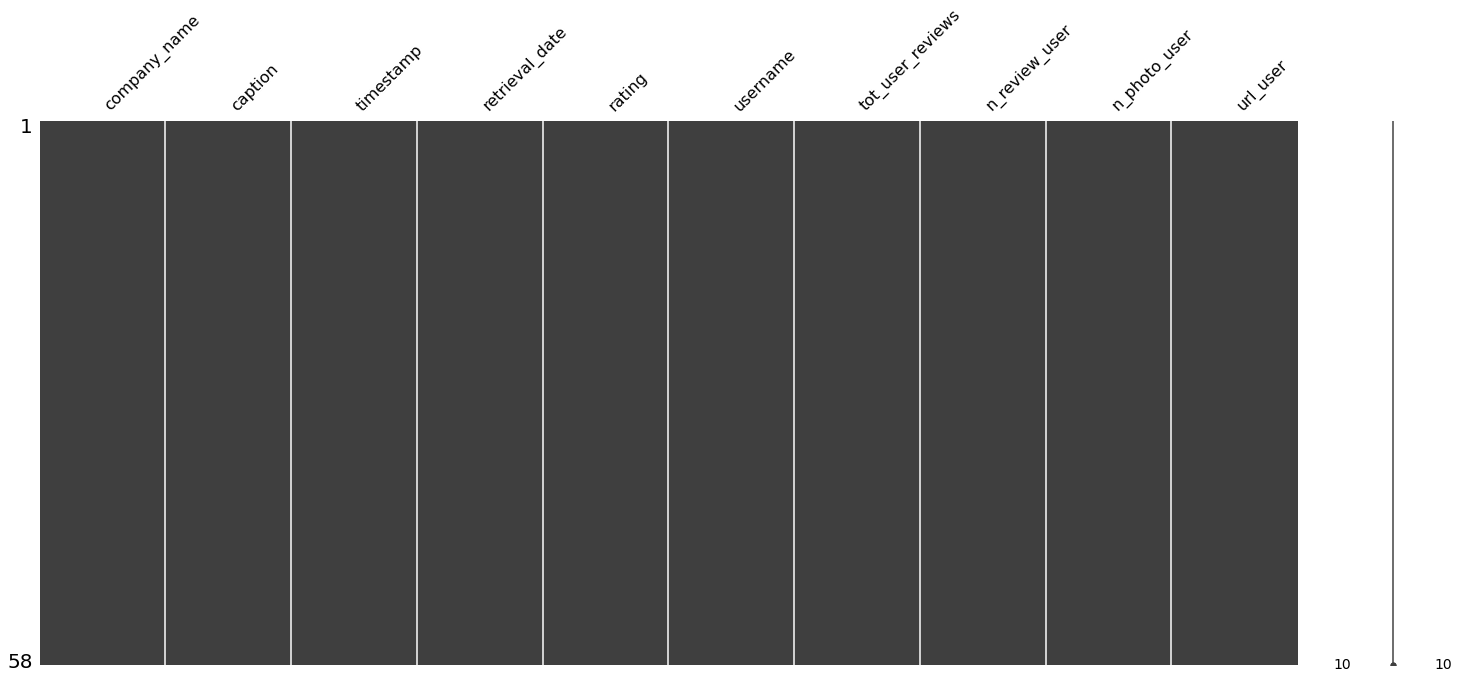

In [210]:
#Get dataset where there are missing values by caption
missingrows = reviews[reviews['tot_user_reviews'].isnull()].index.tolist()
fullrows = reviews[reviews['tot_user_reviews'].notnull()].index.tolist()

msno.matrix(reviews.dropna())


In [211]:
reviews.loc[missingrows]

,company_name,caption,timestamp,retrieval_date,rating,username,tot_user_reviews,n_review_user,n_photo_user,url_user
id_review,,,,,,,,,,
ChZDSUhNMG9nS0VJQ0FnSURjdkl1Mkh3EAE,William's Dairy Bar,NaN,a month ago,01:52.8,5,Brad Clayson,NaN,0,0,https://www.google.com/maps/contrib/1165582983...


# Method 2: Pair-wise deletion

Some columns may have the same value in each row or high correlation in with another column. In this case, the **url_user** column has a 0 for every row so we can simplify the dataset by removing this column. After removing the column, the info() method shows there are only 8 columns. 

In [212]:
#Create a new dataframe to execute the pair-wise deletion method
reviews_pairwise = reviews

In [213]:
# Check to see if all the value are the same, if they are the same the column can be dropped. 
reviews.n_photo_user.unique()

array([0], dtype=int64)

In [214]:
#Delete the columns that do not have different values across each row
reviews_pairwise.drop(['n_photo_user'], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, ChZDSUhNMG9nS0VJQ0FnSUM4d2ZyT2ZBEAE to ChdDSUhNMG9nS0VJQ0FnSURjN04zXzFRRRAB
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name      64 non-null     object 
 1   caption           58 non-null     object 
 2   timestamp         64 non-null     object 
 3   retrieval_date    64 non-null     object 
 4   rating            64 non-null     int64  
 5   username          64 non-null     object 
 6   tot_user_reviews  63 non-null     float64
 7   n_review_user     64 non-null     int64  
 8   url_user          64 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 4.8+ KB


# Method 3: Imputation

For **imputation** we will look at filling missing values with mean/median/mode using the **fillna()** method. The advantage is that it is fast and easy to implement. On the downside we are filling various NaN values with data we don't know is accurate which will skew the data. Below we can look at the number of missing values for numeric columns. In this case, **tot_user_reviews** has 1 NaN value so we will impute it using the mean, median, and mode.

Before we use the fillna() method we need to check how many rows will be updated and that we are updating the correct rows. First, __run reviews.isnull().sum()__ and find that 6 values in the **caption** column and 1 value in the **tot_user_reviews** has a missing value. The **caption** column is categorical so we will only look at the numeric column **tot_user_reviews**. Next, run __reviews[reviews['tot_user_reviews'].isnull()]__ to see which row contains the missing value. In this case, Brad Clayson's review will be imputed with a new value.

In [215]:
#Find how many missing values need to be imputed
print(reviews.isnull().sum())

#Find where tot_user_reviews has an NA
reviews[reviews['tot_user_reviews'].isnull()]

company_name        0
caption             6
timestamp           0
retrieval_date      0
rating              0
username            0
tot_user_reviews    1
n_review_user       0
n_photo_user        0
url_user            0
dtype: int64


,company_name,caption,timestamp,retrieval_date,rating,username,tot_user_reviews,n_review_user,n_photo_user,url_user
id_review,,,,,,,,,,
ChZDSUhNMG9nS0VJQ0FnSURjdkl1Mkh3EAE,William's Dairy Bar,NaN,a month ago,01:52.8,5,Brad Clayson,NaN,0,0,https://www.google.com/maps/contrib/1165582983...


Below, the **fillna()** method is used to impute the mean, median, and mode. 

In [216]:
# Create new dataframes to prepare data fill missing values with the mean, median, and mode.
reviews_fillmean = reviews
reviews_fillmedian = reviews
reviews_fillmode = reviews

#Impute the Nan value in tot_user_reviews with the mean value: 26.9
reviews_fillmean = reviews_fillmean.fillna(reviews_fillmean['tot_user_reviews'].sort_values().mean())#).to_frame()
print(reviews_fillmean.tot_user_reviews.loc[reviews_fillmean['username'] == 'Brad Clayson'])

#Impute the Nan value in tot_user_reviews with the median value: 5
reviews_fillmedian = reviews_fillmedian.fillna(reviews_fillmedian['tot_user_reviews'].sort_values().median())#).to_frame()
print(reviews_fillmedian.tot_user_reviews.loc[reviews_fillmedian['username'] == 'Brad Clayson'])

#Impute the Nan value in tot_user_reviews with the mode value: 1
reviews_fillmode = reviews_fillmode.fillna(reviews_fillmode['tot_user_reviews'].mode()[0])
print(reviews_fillmode.tot_user_reviews.loc[reviews_fillmode['username'] == 'Brad Clayson'])

id_review
ChZDSUhNMG9nS0VJQ0FnSURjdkl1Mkh3EAE    26.984127
Name: tot_user_reviews, dtype: float64
id_review
ChZDSUhNMG9nS0VJQ0FnSURjdkl1Mkh3EAE    5.0
Name: tot_user_reviews, dtype: float64
id_review
ChZDSUhNMG9nS0VJQ0FnSURjdkl1Mkh3EAE    1.0
Name: tot_user_reviews, dtype: float64


Whether you choose the mean, median, or mode will depend on your domain knowledge and understanding of the feature **tot_user_reviews**. This feature is a numeric value that indicates how many total reviews a user has previously given. In this case, we can take a look at the reviewers profile and determine which value makes the most sense for imputation. His profile indicates that he has made one contribution to google reviews, thus we will use the mode.

The msno.matrix() method is used to validate the successful imputation. Other methods can be used to validate the data such as data filtering or .

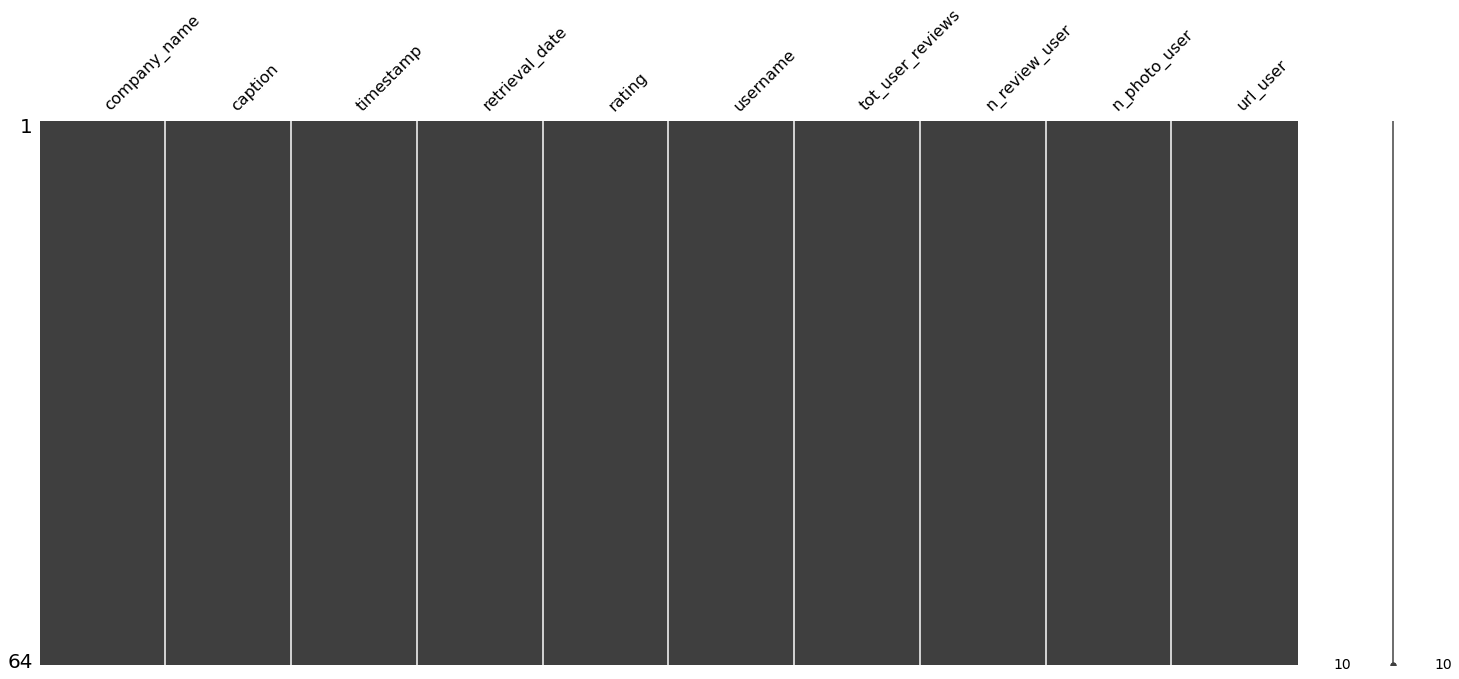

In [217]:
msno.matrix(reviews_fillmode)

# Method 4: Dummy variables

Moving forward we will use the dataframe **reviews_fillmode** with newly imputed data.

Most models can only correctly be fitted using numerical data. The method get_dummies() converts categorical features into numerical features. Get dummies creates a new column for each category in a feature. The **timestamp** column has 12 different categories as strings and get_dummies will create 12 new columns with a 1 or 0 to indicate the existence of that value. The disadvantage is that as the number of features increase, the data becomes sparse and it is harder to support a result that is statistically significant with such few data. This problem is referred to as the curse of dimensionality.

In [218]:
#Use get dummy variables
reviews_fillmode.timestamp.unique()

array(['20 hours ago', '3 days ago', '4 days ago', '5 days ago',
       '6 days ago', 'a week ago', '2 weeks ago', '3 weeks ago',
       'a month ago'], dtype=object)

In [219]:
timestamp_ = pd.get_dummies(reviews_fillmode.timestamp)
timestamp_

,2 weeks ago,20 hours ago,3 days ago,3 weeks ago,4 days ago,5 days ago,6 days ago,a month ago,a week ago
id_review,,,,,,,,,
ChZDSUhNMG9nS0VJQ0FnSUM4d2ZyT2ZBEAE,0,1,0,0,0,0,0,0,0
ChZDSUhNMG9nS0VJQ0FnSUM4dHViblRREAE,0,0,1,0,0,0,0,0,0
ChZDSUhNMG9nS0VJQ0FnSUM4bHQta1BnEAE,0,0,1,0,0,0,0,0,0
ChZDSUhNMG9nS0VJQ0FnSUM4eHRmV1FnEAE,0,0,0,0,1,0,0,0,0
ChdDSUhNMG9nS0VJQ0FnSUM4LXZhV29BRRAB,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
ChZDSUhNMG9nS0VJQ0FnSURjdk5YRkZnEAE,0,0,0,0,0,0,0,1,0
ChdDSUhNMG9nS0VJQ0FnSURjM00ydjhBRRAB,0,0,0,0,0,0,0,1,0
ChdDSUhNMG9nS0VJQ0FnSURjM0o3UmdBRRAB,0,0,0,0,0,0,0,1,0


In [220]:
reviews_dummies = pd.concat([reviews_fillmode.drop('timestamp', axis=1), timestamp_], axis=1)

reviews_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, ChZDSUhNMG9nS0VJQ0FnSUM4d2ZyT2ZBEAE to ChdDSUhNMG9nS0VJQ0FnSURjN04zXzFRRRAB
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name      64 non-null     object 
 1   caption           64 non-null     object 
 2   retrieval_date    64 non-null     object 
 3   rating            64 non-null     int64  
 4   username          64 non-null     object 
 5   tot_user_reviews  64 non-null     float64
 6   n_review_user     64 non-null     int64  
 7   n_photo_user      64 non-null     int64  
 8   url_user          64 non-null     object 
 9   2 weeks ago       64 non-null     uint8  
 10  20 hours ago      64 non-null     uint8  
 11  3 days ago        64 non-null     uint8  
 12  3 weeks ago       64 non-null     uint8  
 13  4 days ago        64 non-null     uint8  
 14  5 days ago        64 non-null     uint8  
 15  6 days ago        64 non-null 

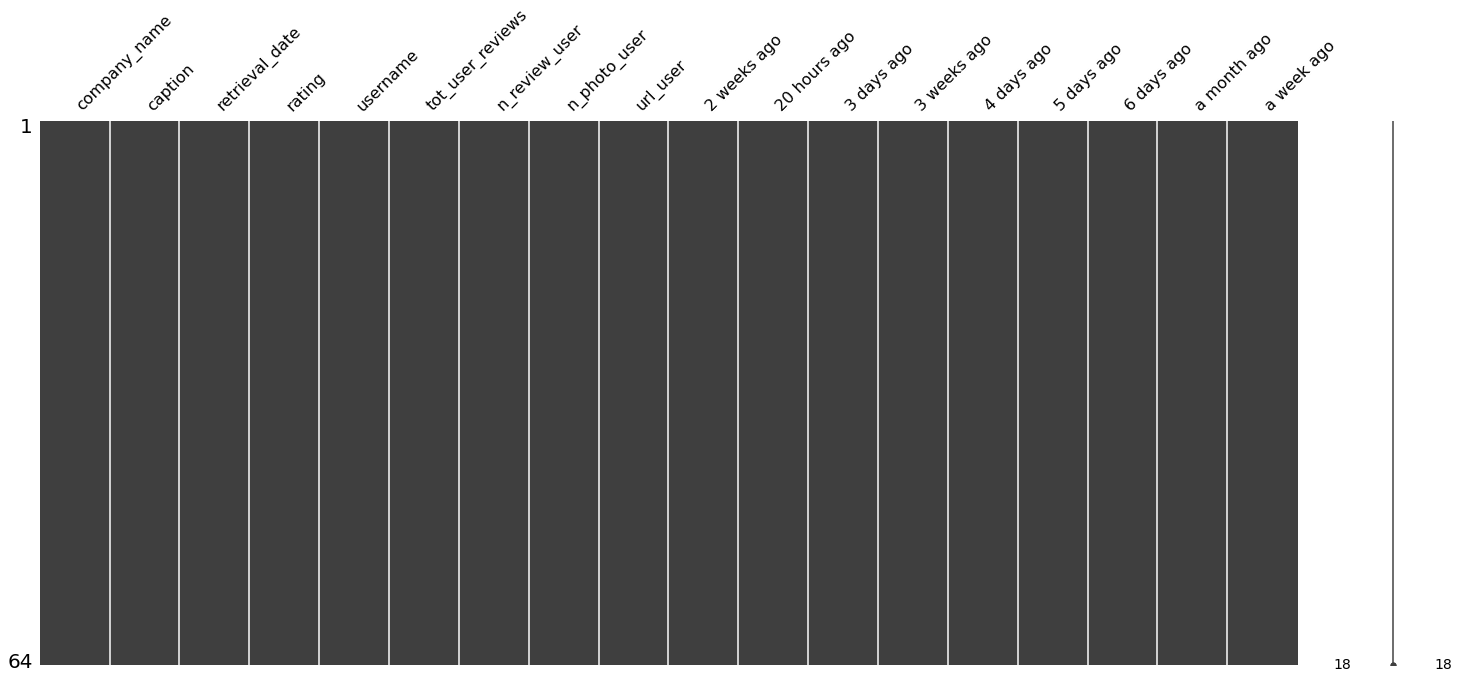

In [221]:
#This mmatrix shows 
msno.matrix(reviews_dummies)

# Method 5: Label and One-Hot Encoding

The last method used to prepare data for modeling (specifically when using regression or SVM) is to label encode and one-hot encode the categorical features. The label encoder instance is created and used to fit and transform each category to an integer. If the categories are Dog, Cat, and Fish the label encoder will transform each category to 0, 1, and 2.  


However, it is necessary to **one-hot encode** these integers because different numeric values will give each category a different weight and ultimately change the results of the model. The OneHotEncoder() object will create a binary vector. This vector is an array of 0's or 1's. The position of the 1 in the vector indicates which category it pertains to. For example, if the categories are Dog, Cat, and Fish the Dog category will be indicated as a [1, 0, 0] vector. If the category is Cat, the vector will be [0, 1, 0]. Below we **label and one-hot encode** the **timestamp** column which results in an array of 96 binary vectors. 

In [222]:
reviews_fillmode.timestamp

id_review
ChZDSUhNMG9nS0VJQ0FnSUM4d2ZyT2ZBEAE     20 hours ago
ChZDSUhNMG9nS0VJQ0FnSUM4dHViblRREAE       3 days ago
ChZDSUhNMG9nS0VJQ0FnSUM4bHQta1BnEAE       3 days ago
ChZDSUhNMG9nS0VJQ0FnSUM4eHRmV1FnEAE       4 days ago
ChdDSUhNMG9nS0VJQ0FnSUM4LXZhV29BRRAB      5 days ago
                                            ...     
ChZDSUhNMG9nS0VJQ0FnSURjdk5YRkZnEAE      a month ago
ChdDSUhNMG9nS0VJQ0FnSURjM00ydjhBRRAB     a month ago
ChdDSUhNMG9nS0VJQ0FnSURjM0o3UmdBRRAB     a month ago
ChZDSUhNMG9nS0VJQ0FnSURjN0pPUlRREAE      a month ago
ChdDSUhNMG9nS0VJQ0FnSURjN04zXzFRRRAB     a month ago
Name: timestamp, Length: 64, dtype: object

The comments in the next cell outline the process to one hot encode a categorical column. Use the **label_encoder.inverse_transform()** method to get the label after the data has been transformed.

In [223]:
from numpy import array
from numpy import argmax
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

review_onehot = pd.DataFrame(reviews_fillmode.timestamp, columns=['timestamp'])

# Create a one hot encoder
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Create instance of LabelEncoder
label_encoder = LabelEncoder()
review_onehot['timestamp_cat'] = label_encoder.fit_transform(reviews['timestamp'])

# reshape categories into array to prep for one hot encoding
review_onehot1 = np.array(review_onehot['timestamp_cat']).reshape(len(review_onehot['timestamp_cat']), 1)

# Get a label back from the binary vectors using the inverse_transform method
onehot_encoded1 = onehot_encoder.fit_transform(np.array(review_onehot1))
label_encoder.inverse_transform([argmax(onehot_encoded1[0,:])])

#review_onehot.head(20)
columns1 = onehot_encoder.get_feature_names([reviews.timestamp.unique()])[0]
#onehot_encoder.get_feature_names()

In [224]:
onehot_df = pd.DataFrame(onehot_encoded1, columns=columns1, index=reviews_fillmode.index)

#Concatenate the one-hot encoded dataframe to the reviews_fillmode dataframe
reviews_onehotencoded_complete = pd.concat([reviews_fillmode, onehot_df], axis=1)
reviews_onehotencoded_complete

,company_name,caption,timestamp,retrieval_date,rating,username,tot_user_reviews,n_review_user,n_photo_user,url_user,20 hours ago_0,3 days ago_0,4 days ago_0,5 days ago_0,6 days ago_0,a week ago_0,2 weeks ago_0,3 weeks ago_0,a month ago_0
id_review,,,,,,,,,,,,,,,,,,,
ChZDSUhNMG9nS0VJQ0FnSUM4d2ZyT2ZBEAE,William's Dairy Bar,Great icecream for a very reasonable price. Th...,20 hours ago,01:14.9,5,Cache Hancey,69.0,0,0,https://www.google.com/maps/contrib/1153190339...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ChZDSUhNMG9nS0VJQ0FnSUM4dHViblRREAE,William's Dairy Bar,I've only been once and while I appreciate the...,3 days ago,01:15.1,4,Kevin Mock,50.0,0,0,https://www.google.com/maps/contrib/1024252868...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ChZDSUhNMG9nS0VJQ0FnSUM4bHQta1BnEAE,William's Dairy Bar,Best soft serve in Utah for the best price.,3 days ago,01:15.2,5,Jordyn Hansen Burton,54.0,0,0,https://www.google.com/maps/contrib/1073532323...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ChZDSUhNMG9nS0VJQ0FnSUM4eHRmV1FnEAE,William's Dairy Bar,Very tasty ice cream!!!!,4 days ago,01:15.4,5,Roberto Robbertze,1.0,1,0,https://www.google.com/maps/contrib/1133550838...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ChdDSUhNMG9nS0VJQ0FnSUM4LXZhV29BRRAB,William's Dairy Bar,Fantastic ice cream and amazing shakes!,5 days ago,01:15.5,5,Brandon Derbidge,11.0,0,0,https://www.google.com/maps/contrib/1064034183...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ChZDSUhNMG9nS0VJQ0FnSURjdk5YRkZnEAE,William's Dairy Bar,This is the best ice cream around. The soft se...,a month ago,01:53.4,5,Kyle Lee,2.0,2,0,https://www.google.com/maps/contrib/1168822673...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ChdDSUhNMG9nS0VJQ0FnSURjM00ydjhBRRAB,William's Dairy Bar,Super reasonably priced and really good! I was...,a month ago,02:00.1,5,Ethan Bakker,5.0,5,0,https://www.google.com/maps/contrib/1144605434...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ChdDSUhNMG9nS0VJQ0FnSURjM0o3UmdBRRAB,William's Dairy Bar,Delicious soft serve with a variety of flavors...,a month ago,02:00.4,5,Trevor Ralph,14.0,14,0,https://www.google.com/maps/contrib/1004387071...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Automation: 
Here we will write a function for each method we learned. Automating data cleaning methods will allow us to update our datasets real-time. This is a very important aspect of the data pipeline for modeling as we can make real-time predictions.

I have written 3 functions dataprep(), dummies_df(), and onehot(). The dataprep() function uses either the **listwise** or **pairwise** method to get ride of rows/columns with missing values. While the dummies_df() and onehot() functions converts a categorical column and into binary columns and concatentates them to the original dataframe.   

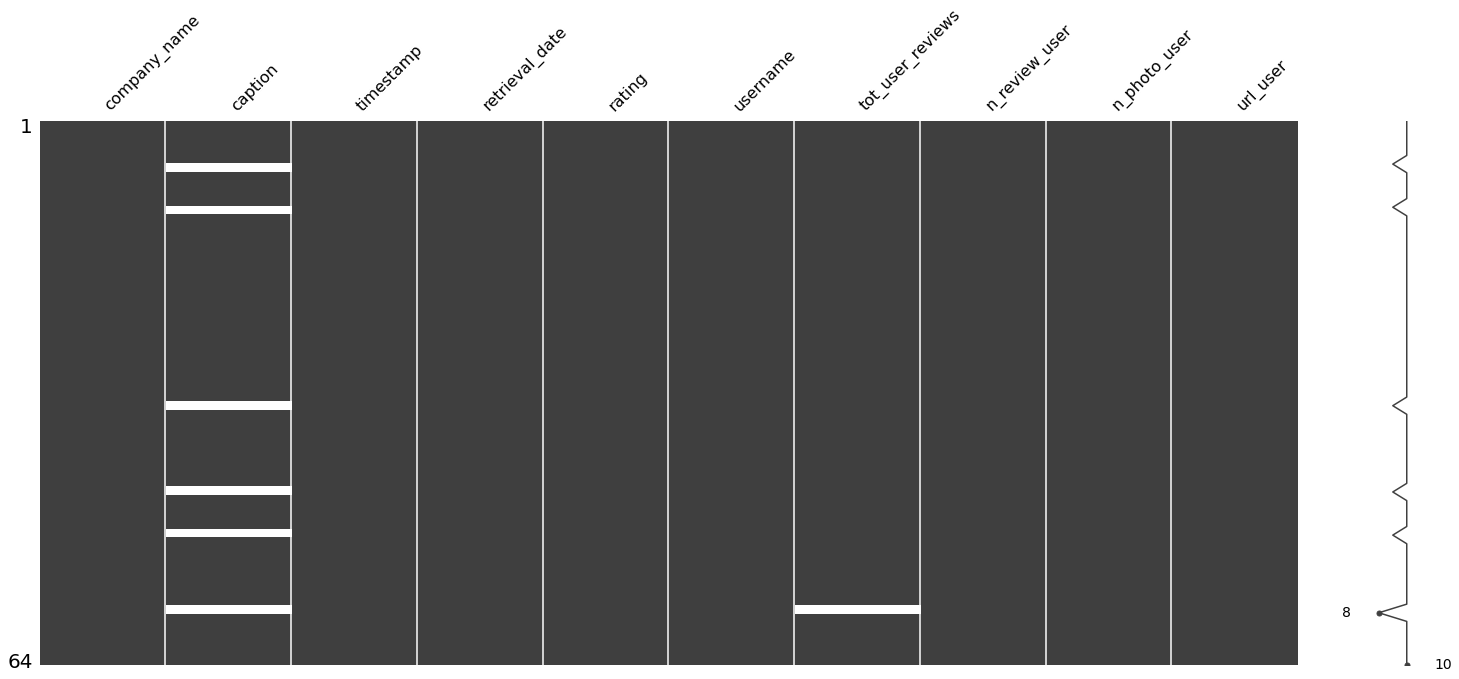

In [225]:
notnulltest = reviews[reviews.notnull()].index.tolist()
msno.matrix(reviews.loc[notnulltest])

In [234]:
def dataprep(df, prep_type):
    cols = []
    
    if prep_type == 'listwise':
        #Remove rows that have missing values
        #print(prep_type)
        df = df.dropna()
        #print("DF after Listwise Deletion:\n ", df.info())
    elif prep_type == 'pairwise':
        #Drop columns that have the same value for each row
        for col in df.columns:
            if len(df[col].unique()) == 1:
                df = df.drop([col], axis=1) 
        #print("DF after Pairwise Deletion:\n ", df.info())
    
    return df #Return a dataframe that either has rows (listwise) or columns (pairwise) deleted

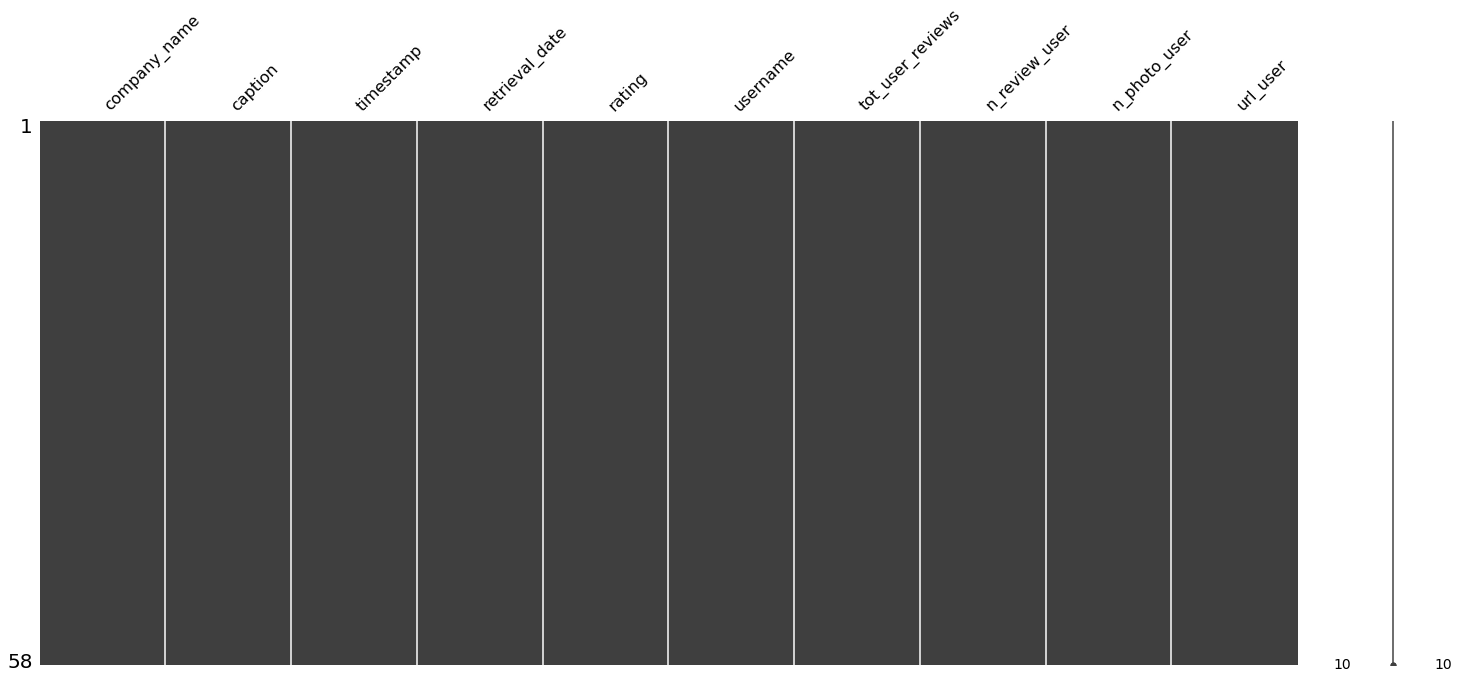

In [238]:
# Run function for pariwise deletion. This deletes any columns that all have the same row value. 
msno.matrix(dataprep(reviews, 'listwise')) 
# The bottom left hand corner indicates number rows. 6 rows were deleted, there are 58 now in total

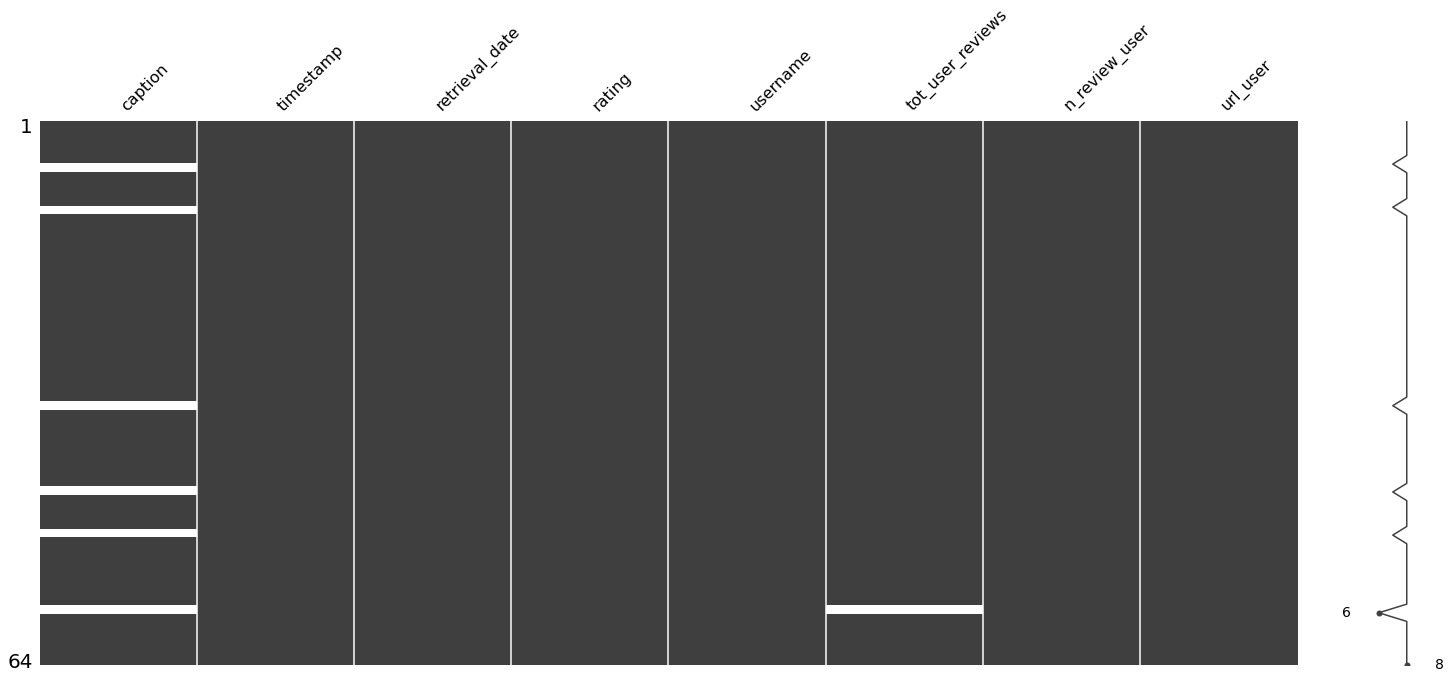

In [239]:
# After running the dataprep function with the pairwise parameter, 2 columns were removed 'company name' and 'n_photo_user' 
msno.matrix(dataprep(reviews, 'pairwise'))

Write a function that creates a new dataset and dummies out the categorical variables

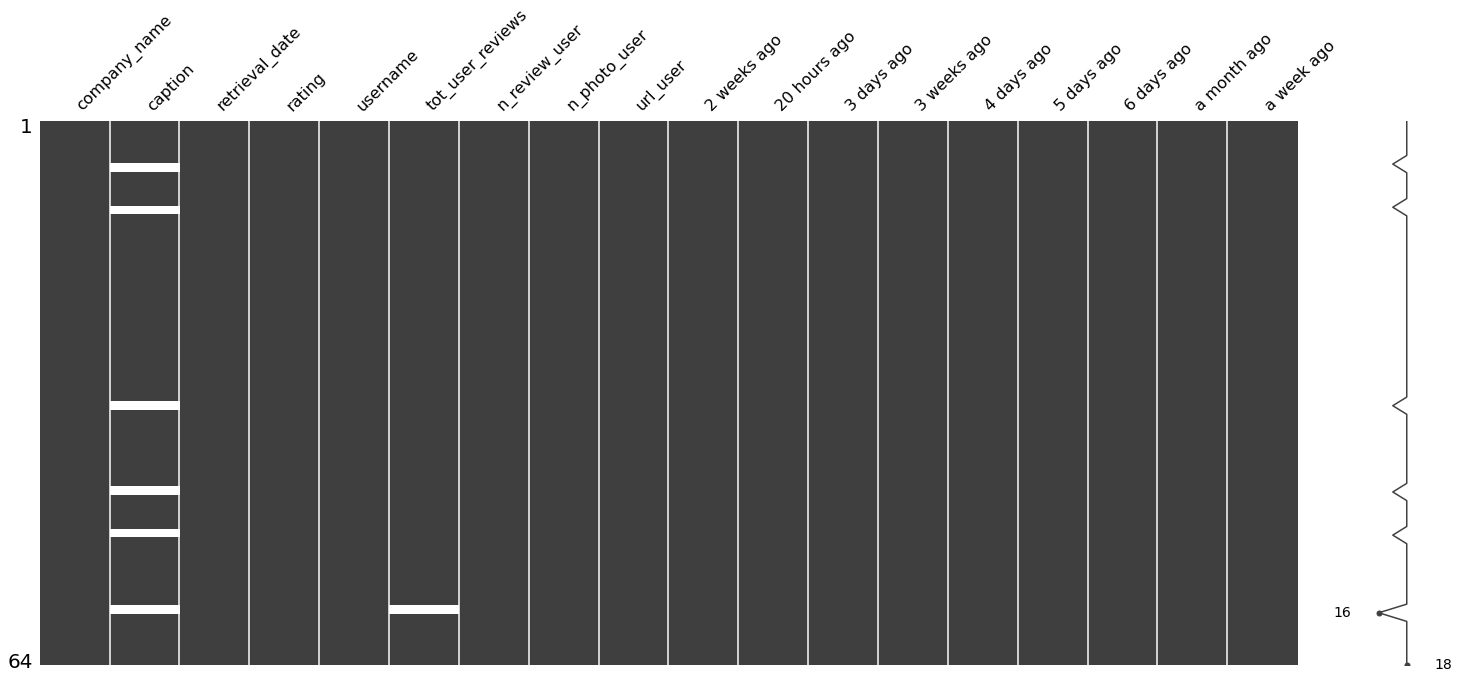

In [240]:
def dummies_df(df, col):
    
    #Call get_dummies method
    dummies_df = pd.get_dummies(df[col])
    
    #Concatenate dummies df
    dummies_df2 = pd.concat([df.drop(col, axis=1), dummies_df], axis=1)
    
    return dummies_df2

#Get dummies for the timestamp column 
msno.matrix(dummies_df(reviews, 'timestamp'))

Write a function that label and one-hot encodes a categorical feature

In [241]:
def onehot(df, col):
    #Create instance of a LabelEncoder and OneHoteEncoder
    label_enc = LabelEncoder()
    onehot_enc = OneHotEncoder(handle_unknown='ignore')
    
    review_onehot = pd.DataFrame(df, columns=[col])
    
    #Label encode the timestamp column
    review_onehot['timestamp_cat'] = label_enc.fit_transform(df[col])
    
    # Reshape categories into an array with (,1) dimensions to prep for one hot encoding
    reshaped = np.array(review_onehot['timestamp_cat']).reshape(len(review_onehot.timestamp_cat), 1)
    
    # Use the fit_transform method from the one hot encoder object to create an array of binary vectors
    onehot_encoded = onehot_enc.fit_transform(reshaped)
    
    # Convert one hot encoded matrix into a Dataframe using the category names and original dataframe index
    columns1 = onehot_enc.get_feature_names([df[col].unique()])[0]
    onehot_df = pd.DataFrame.sparse.from_spmatrix(onehot_encoded, columns=columns1, index=df.index)
    
    # Create new DF with previous values and one hot encoded df
    df_full = pd.concat([df, onehot_df], axis=1)

    
    return df_full

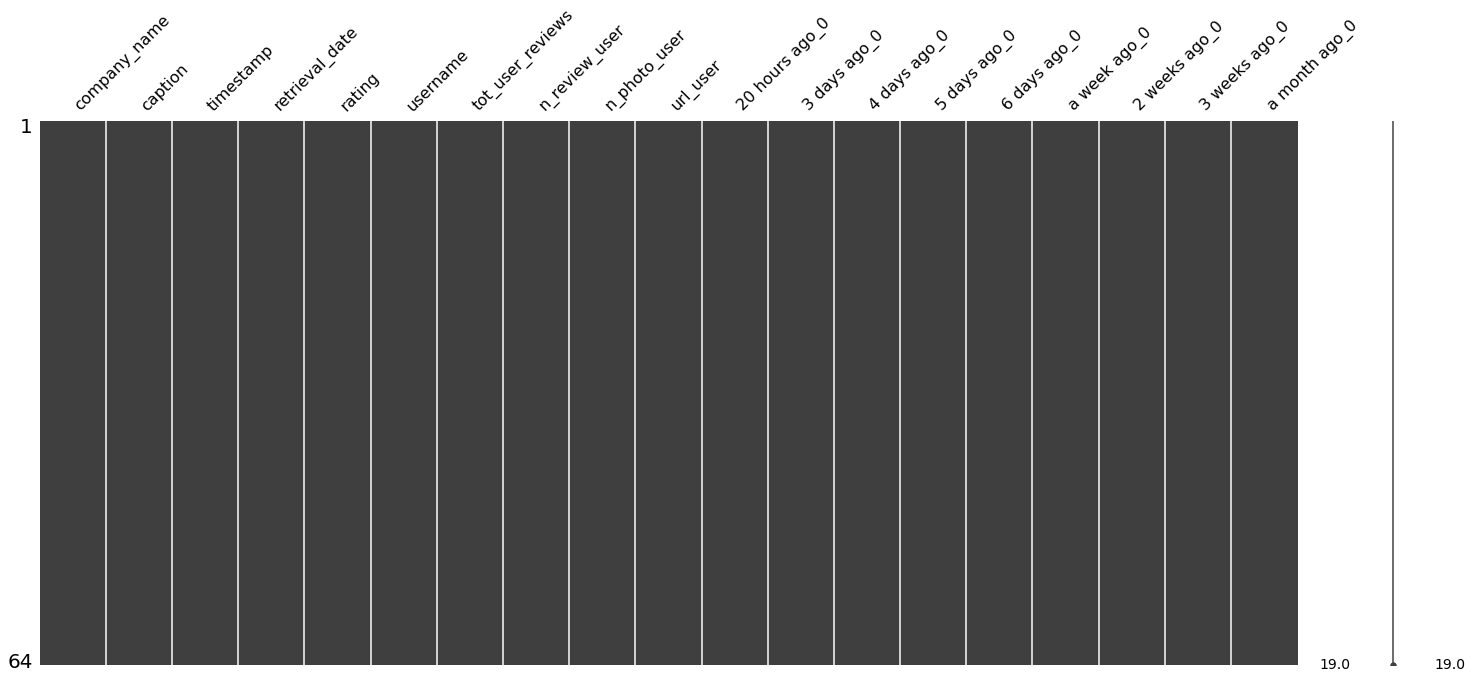

In [242]:
msno.matrix(onehot(reviews_fillmode, 'timestamp'))

In Conclusion, there are a variety of ways to prepare your data for modeling. We looked at list-wise, pair-wise, dummying, label and one-hot encoding methods and how to automate each using functions.